<a href="https://colab.research.google.com/github/habakan/deep_colab_zoo/blob/master/image/object_detection/EfficientDet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/google/automl.git

fatal: destination path 'automl' already exists and is not an empty directory.


In [2]:
%cd ./automl/efficientdet

/content/automl/efficientdet


In [3]:
!pip install -r requirements.txt

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-x1zismqu
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-x1zismqu
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=265563 sha256=11b47dc4d09abeedd20c78bba706b69d09f65fb9c7ecfff5c44a422ec98297e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-cfo9lnwb/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools


In [4]:
!pip install -U PyYAML

Requirement already up-to-date: PyYAML in /usr/local/lib/python3.6/dist-packages (5.3.1)


In [5]:
# Download and convert pascal data.
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_11-May-2012.tar
!mkdir tfrecord
!PYTHONPATH=".:$PYTHONPATH"  python dataset/create_pascal_tfrecord.py  \
    --data_dir=VOCdevkit --year=VOC2012  --output_path=tfrecord/pascal

# Download backbone checkopints.
!wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/efficientdet-d0.tar.gz
!tar xf efficientdet-d0.tar.gz

--2021-01-04 01:02:10--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar.1’

VOCtrainval_11-May- 100%[===================>]   1.86G  9.45MB/s    in 3m 28s  

2021-01-04 01:05:38 (9.19 MB/s) - ‘VOCtrainval_11-May-2012.tar.1’ saved [1999639040/1999639040]

mkdir: cannot create directory ‘tfrecord’: File exists
2021-01-04 01:06:36.043545: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
I0104 01:06:37.989094 139983193511808 create_pascal_tfrecord.py:258] Writing to output directory: tfrecord
I0104 01:06:38.068961 139983193511808 create_pascal_tfrecord.py:289] Reading from PASCAL VOC2012 dataset.
I0104 01:0

In [6]:
!ls

aug			   keras
backbone		   main.py
coco_metric.py		   model_inspect.py
coco_metric_test.py	   model_inspect_test.py
dataloader.py		   nms_np.py
dataloader_test.py	   object_detection
dataset			   output
det_model_fn.py		   __pycache__
det_model_fn_test.py	   README.md
efficientdet_arch.py	   requirements.txt
efficientdet_arch_test.py  tensorrt.py
efficientdet-d0		   testdata
efficientdet-d0.tar.gz	   test.sh
efficientdet-d0.tar.gz.1   test_util.py
efficientdet-d0.tar.gz.2   tfrecord
g3doc			   tutorial.ipynb
hparams_config.py	   utils.py
hparams_config_test.py	   utils_test.py
inference.py		   visualize
__init__.py		   voc_config.yaml
install_deps.sh		   VOCdevkit
iou_utils.py		   VOCtrainval_11-May-2012.tar
iou_utils_test.py	   VOCtrainval_11-May-2012.tar.1


In [7]:
!echo -e "num_classes: 21\nvar_freeze_expr: '(efficientnet|fpn_cells|resample_p6)'\nlabel_map: {1: aeroplane, 2: bicycle, 3: bird, 4: boat, 5: bottle, 6: bus, 7: car, 8: cat, 9: chair, 10: cow, 11: diningtable, 12: dog, 13: horse, 14: motorbike, 15: person, 16: pottedplant, 17: sheep, 18: sofa, 19: train, 20: tvmonitor}" > voc_config.yaml

In [8]:
!cat voc_config.yaml

num_classes: 21
var_freeze_expr: '(efficientnet|fpn_cells|resample_p6)'
label_map: {1: aeroplane, 2: bicycle, 3: bird, 4: boat, 5: bottle, 6: bus, 7: car, 8: cat, 9: chair, 10: cow, 11: diningtable, 12: dog, 13: horse, 14: motorbike, 15: person, 16: pottedplant, 17: sheep, 18: sofa, 19: train, 20: tvmonitor}


In [9]:
!wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/efficientdet-d0.tar.gz
!tar xf efficientdet-d0.tar.gz

--2021-01-04 01:06:47--  https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/efficientdet-d0.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.20.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28994253 (28M) [application/octet-stream]
Saving to: ‘efficientdet-d0.tar.gz.3’

efficientdet-d0.tar 100%[===================>]  27.65M  --.-KB/s    in 0.08s   

2021-01-04 01:06:48 (334 MB/s) - ‘efficientdet-d0.tar.gz.3’ saved [28994253/28994253]



In [10]:
!mkdir output

mkdir: cannot create directory ‘output’: File exists


In [11]:
!python main.py --mode=train \
  --train_file_pattern=tfrecord/pascal*.tfrecord \
  --val_file_pattern=tfrecord/pascal*.tfrecord \
  --model_name=efficientdet-d0 \
  --model_dir=./output/efficientdet-d0-finetune  \
  --ckpt=efficientdet-d0  \
  --train_batch_size=64 \
  --eval_batch_size=64 --eval_samples=1024 \
  --num_examples_per_epoch=5717 --num_epochs=1  \
  --hparams=voc_config.yaml \
  --strategy=gpus

2021-01-04 01:06:48.913227: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
I0104 01:06:50.890061 140563363735424 main.py:264] {'name': 'efficientdet-d0', 'act_type': 'swish', 'image_size': (512, 512), 'target_size': None, 'input_rand_hflip': True, 'jitter_min': 0.1, 'jitter_max': 2.0, 'autoaugment_policy': None, 'grid_mask': False, 'sample_image': None, 'map_freq': 5, 'num_classes': 21, 'seg_num_classes': 3, 'heads': ['object_detection'], 'skip_crowd_during_training': True, 'label_map': {1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 16: 'pottedplant', 17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor'}, 'max_instances_per_image': 100, 'regenerate_source_id': False, 'min_level': 3, 'max_level': 7, 'num_scales': 3, 'aspect_ratios': [1.0, 2.0, 0.5], 'anchor_scale': 4.0, 'i

In [12]:
!python model_inspect.py --runmode=infer \
  --model_name=efficientdet-d0   --ckpt_path=./output/efficientdet-d0-finetune \
  --hparams=voc_config.yaml  \
  --input_image=testdata/img1.jpg --output_image_dir=./output

2021-01-04 01:06:52.660028: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-01-04 01:06:54.660325: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-04 01:06:54.661170: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-04 01:06:54.694889: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-04 01:06:54.695451: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2021-01-04 01:06:54.695488: I tensorflow/stream_executor/platform/default/dso_loade

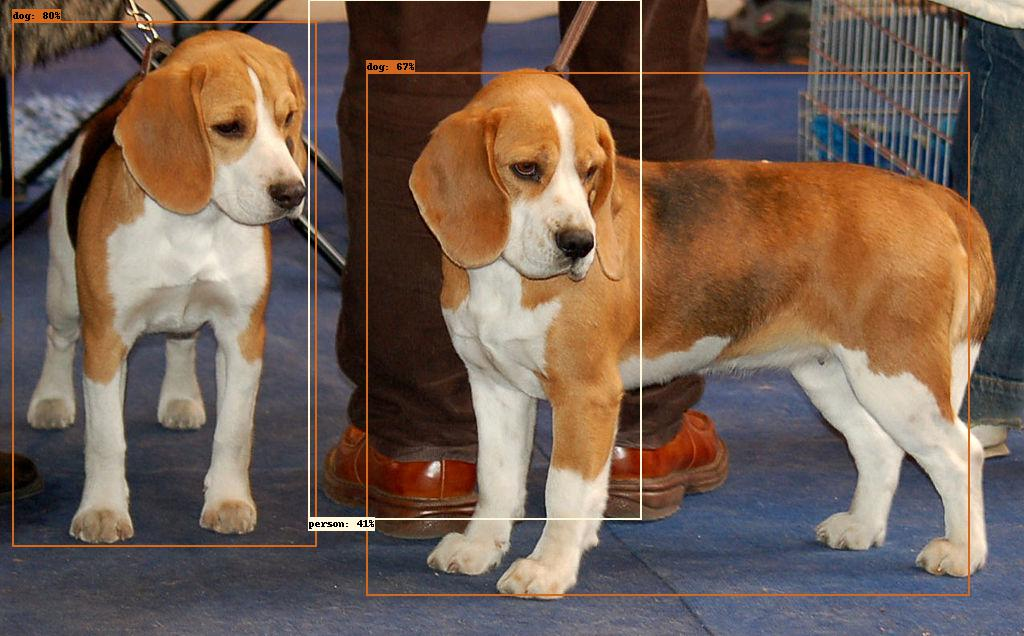

In [13]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('./output/0.jpg'))

In [14]:
!ls /tmp

__pycache__
